<a href="https://colab.research.google.com/github/Rerzd/Ibm_data_science_notes/blob/main/Coursera_Data_Analysis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 3: Model refinement and evaluation (Cars Dataset)


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(url, header=0)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
# We must drop first 2 columns since they do not apport any new info
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace= True)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

### Functions for plotting

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 12
    plt.figure(figsize=(width,height))

    ax1 = sns.kdeplot(RedFunction, color='r', label = RedName)
    ax2 = sns.kdeplot(BlueFunction, color = 'b', label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of cars')
    plt.show()
    plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 12
    plt.figure(figsize=(width, height))

    xmax= max([xtrain.values.max(), xtest.values.max()])

    xmin= min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Training and testing:

An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y_data:

In [ ]:
y_data = df['price']

In [ ]:
# Drop price data in a new dataframe
x_data= df.drop('price',axis=1)

In [ ]:
''' Now we randomly split our data into training and testing data
using the function train_test_split.''';

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print(f"number of test samples: {x_test.shape[0]}")
print(f"number of training samples: {x_train.shape[0]}")

number of test samples: 21
number of training samples: 180


In [ ]:
''' The test_size parameter sets the proportion of data that is split into
the testing set. In the above, the testing set is 10% of the total dataset.''';

# Now let's check up a case where we use 40% for test and 60% for training
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print(f"number of test samples: {x_test1.shape[0]}")
print(f"number of training samples: {x_train1.shape[0]}")

number of test samples: 81
number of training samples: 120


In [ ]:
# Create object linear regression
lre = LinearRegression()
lre

LinearRegression()

In [ ]:
# Fit the model with "horsepower"
lre.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [ ]:
# Calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [ ]:
# R2 is lower than in the previous testing data
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [ ]:
# Find R^2 on the test using the 40% of the dataset for testing
print(lre.score(x_test1[['horsepower']], y_test1))
print(lre.score(x_train1[['horsepower']], y_train1))

''' note: Sometimes you do not have sufficient testing data; as a result,
you may want to perform cross-validation. Let's go over several methods
that you can use for cross-validation''';


0.7565592251392639
0.5589207284321129


In [ ]:
'''We input the object, the feature ("horsepower"),
and the target data (y_data). The parameter 'cv' determines the number
of folds. In this case, it is 4.''';
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data , cv=4)

#The default scoring is R^2. Each element in the array has the average R^2 value for the fold
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [ ]:
#Now let's calulate the average and standard deviation of our estimate
print(f"The mean of the folds are {Rcross.mean()} with a standard deviation of {Rcross.std()}")

The mean of the folds are 0.522009915042119 with a standard deviation of 0.291183944475603


In [ ]:
''' We can use negative squared error as a score by setting the parameter
'scoring' metric to 'neg_mean_squared_error'.''';
Rcross_neg =-1 * cross_val_score(lre,x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')
Rcross_neg

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [ ]:
''' Calculate the average R^2 using two folds, then find the average R^2 for
the second fold utilizing the "horsepower" feature''';
Rc2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print(f"The mean of the folds are {Rc2.mean()}")

The mean of the folds are 0.5166761697127429


In [ ]:
'''You can also use the function 'cross_val_predict' to predict the output
We input the object, the feature "horsepower", and the target data y_data.
The parameter 'cv' determines the number of folds. In this case, it is 4.
We can produce an output:''';

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Part 2: Overfitting, underfitting and model selection

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [ ]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [ ]:
# Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [ ]:
# Now using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

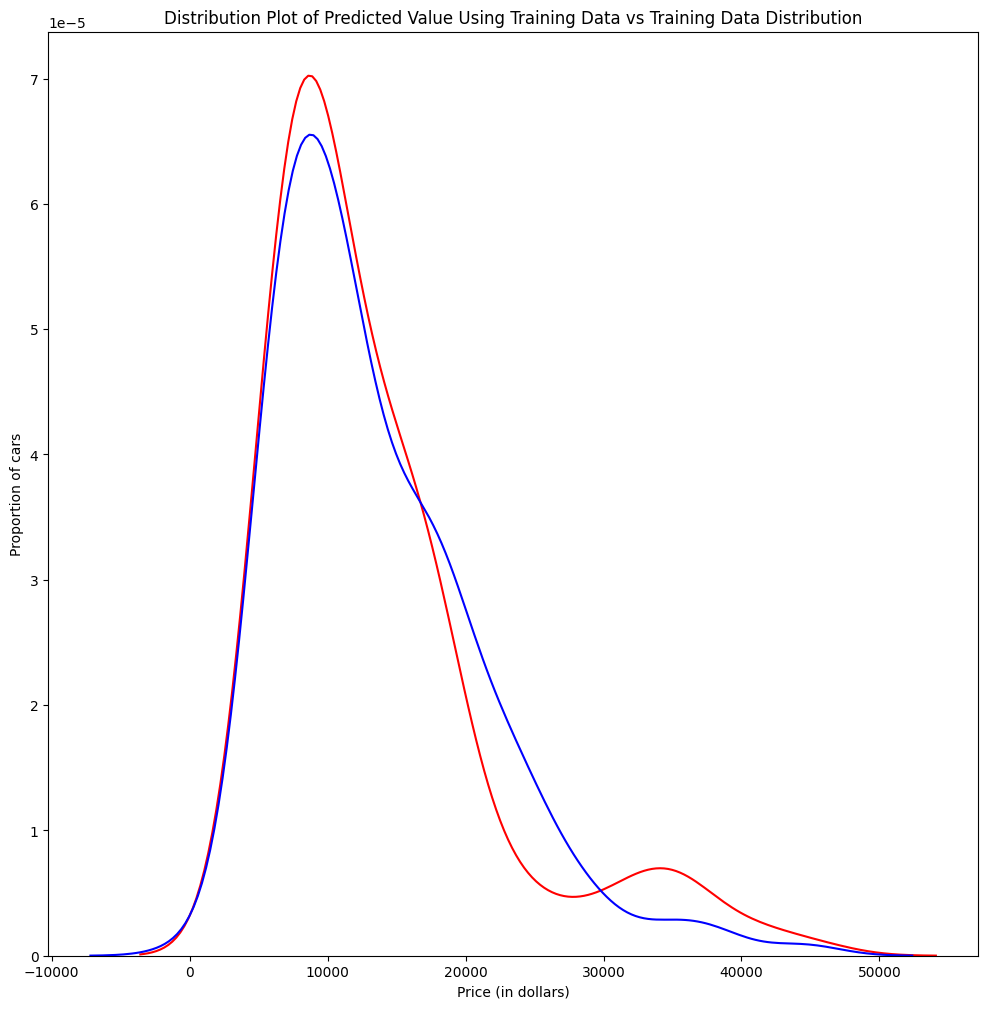

In [ ]:
''' Let's perform some model evaluation using our training and testing data
separately. First, we import the seaborn and matplotlib library for plotting.''',

%matplotlib inline

# Now we examine the distribution of the predicted values of the training data
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Test)", Title)

''' So far, the model seems to be doing well in learning from the training
dataset. But what happens when the model encounters new data from the testing
dataset? When the model generates new values from the test data, we see the
distribution of the predicted values is much different from the actual target values.''';

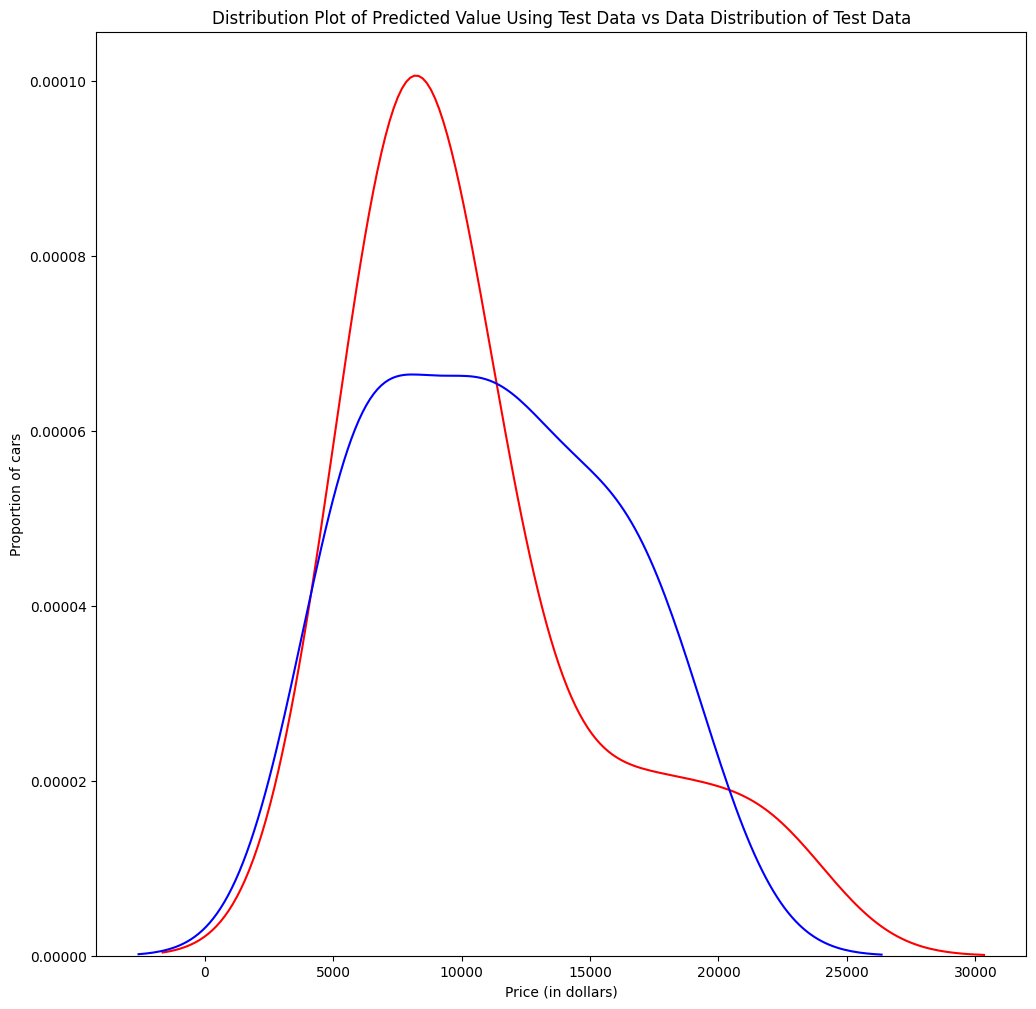

In [ ]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

'''Comparing Figure 1 and Figure 2, it is evident that the distribution of the
test data in Figure 1 is much better at fitting the data. This difference in
Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of
the distribution is extremely different. Let's see if polynomial regression also
exhibits a drop in the prediction accuracy when analysing the test dataset.''';

### Overfitting

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.


In [ ]:
# Now we use 55% of the data for training adn the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.45, random_state=0)

In [ ]:
# Perform a degree 5 polynomial transformation on the feat 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [ ]:
# Now calculate linear Regression  model 'poly' and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [ ]:
# See the output of our model
yhat = poly.predict(x_test_pr)
yhat[:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [ ]:
# Let's take the first 5 predicted values and compare with targets
print(f"Predicted values {yhat[:4]}")
print(f"True values {y_test[:4].values}")

Predicted values [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values [ 6295. 10698. 13860. 13499.]


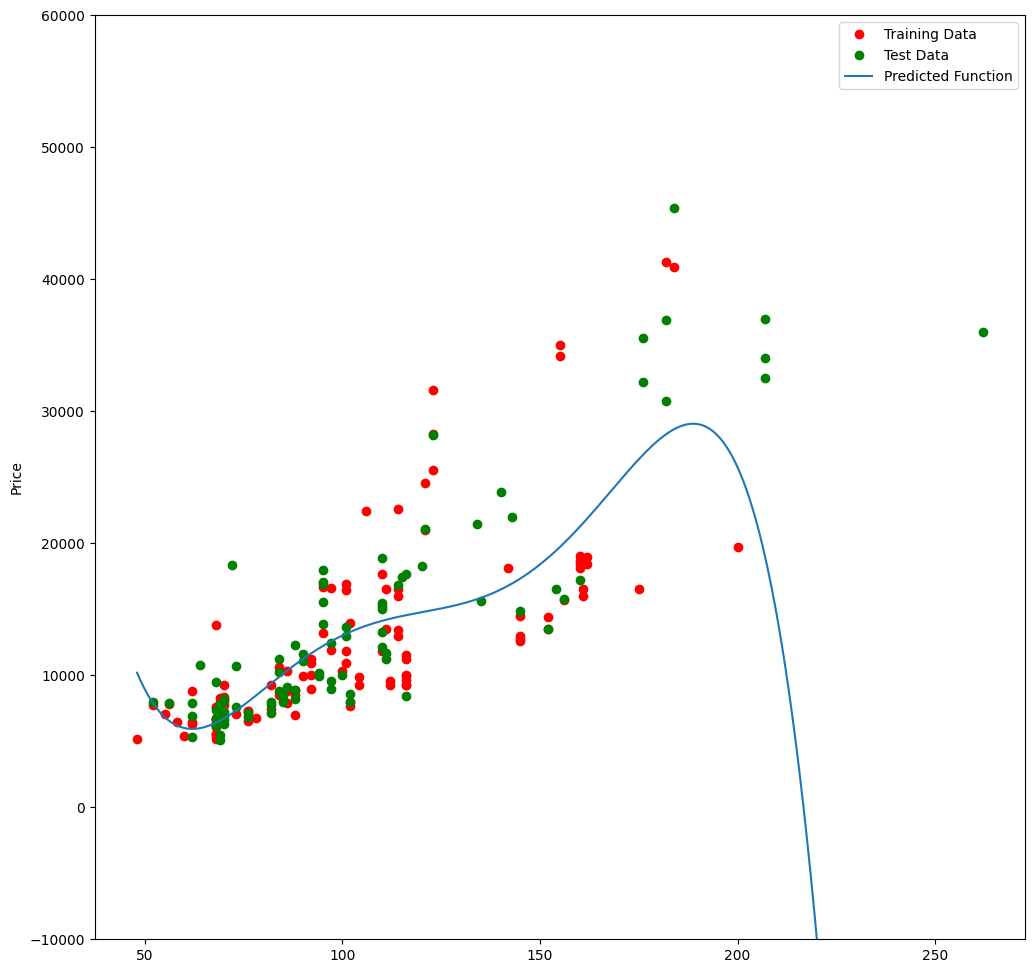

In [ ]:
# Now display the data
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

''' We see that the estimated function appears to track the data but around
200 horsepower, the function begins to diverge from the data points''';


In [ ]:
# R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716902120254

In [ ]:
# R^^2 of the test data. negative R^2 means overfitting
poly.score(x_test_pr, y_test)

-29.871340302043684

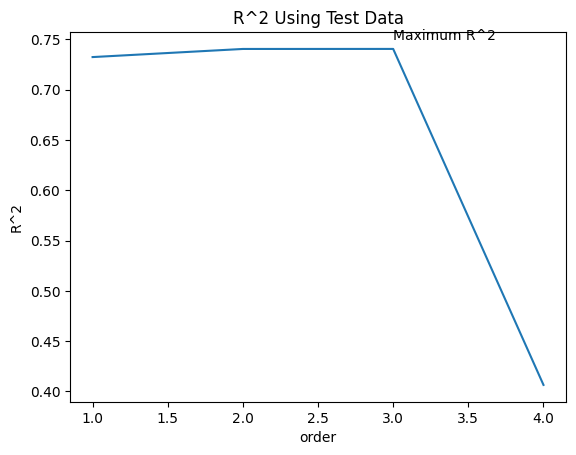

In [ ]:
#Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Rsqu_test = []
order = [1,2,3,4]
for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  lr.fit(x_train_pr, y_train)
  Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

''' This basically means in which degree the model starts to decay and which
fits better than the order. In this case, the peak is 3rd degree''';

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [ ]:
''' The following interface allows you to experiment with different polynomial
orders and different amounts of data.''';

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [ ]:
# Polynomial transformations with more than one feature, Create a feature of degree 2
pr1 = PolynomialFeatures(degree=2)

''' Transform the training and testing samples for the features 'horsepower',
'curb-weight', 'engine-size' and 'highway-mpg'.''';

x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])

x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size', 'highway-mpg']])

In [ ]:
print(x_train_pr1.shape)
print(x_test_pr1.shape)

(110, 15)
(91, 15)


In [ ]:
'''Create a linear regression model "poly1". Train the object using the method
"fit" using the polynomial features''';

poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

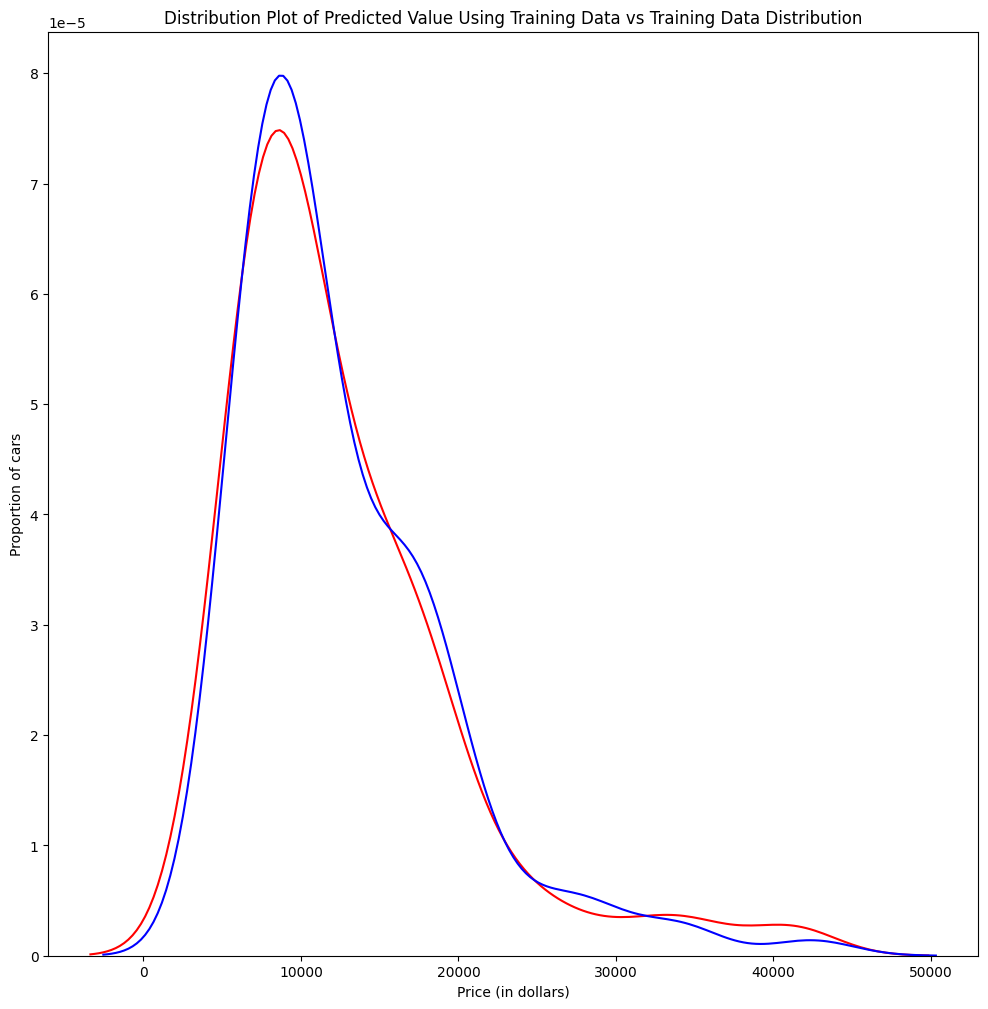

In [ ]:
yhat_train1 = poly1.predict(x_train_pr1)

Title1 = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train1, "Actual Values (Train)", "Predicted Values (Test)", Title1)

### Ridge Regression

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [ ]:
# Create ridge regression object, setting regularization alpha to 0.1
RidgeModel = Ridge(alpha= 1)

In [ ]:
# Fit the model using the method fit
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [ ]:
# Now we can obtain a prediction
yhat = RidgeModel.predict(x_test_pr)

In [ ]:
# Now we compare five preicted samples to our test set
print(f"predicted values {yhat[:4]}")
print(f"test set: {y_test[:4].values}")

predicted values [ 7439.15485492  7826.49627157 11284.32208136 19953.96351143]
test set: [ 6295. 10698. 13860. 13499.]


In [ ]:
'''We select the value of alpha that minimizes the test error. To do so, we
 can use a for loop. We have also created a progress bar to see how many
  iterations we have completed so far.''';

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,10000))
pbar = tqdm(Alpha)
for alpha in pbar:
  RidgeModel = Ridge(alpha=alpha)
  RidgeModel.fit(x_train_pr, y_train)
  test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)

  pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

  Rsqu_test.append(test_score)
  Rsqu_train.append(RidgeModel.score(x_train_pr, y_train))

100%|██████████| 10000/10000 [01:17<00:00, 129.50it/s, Test Score=0.713, Train Score=0.534]


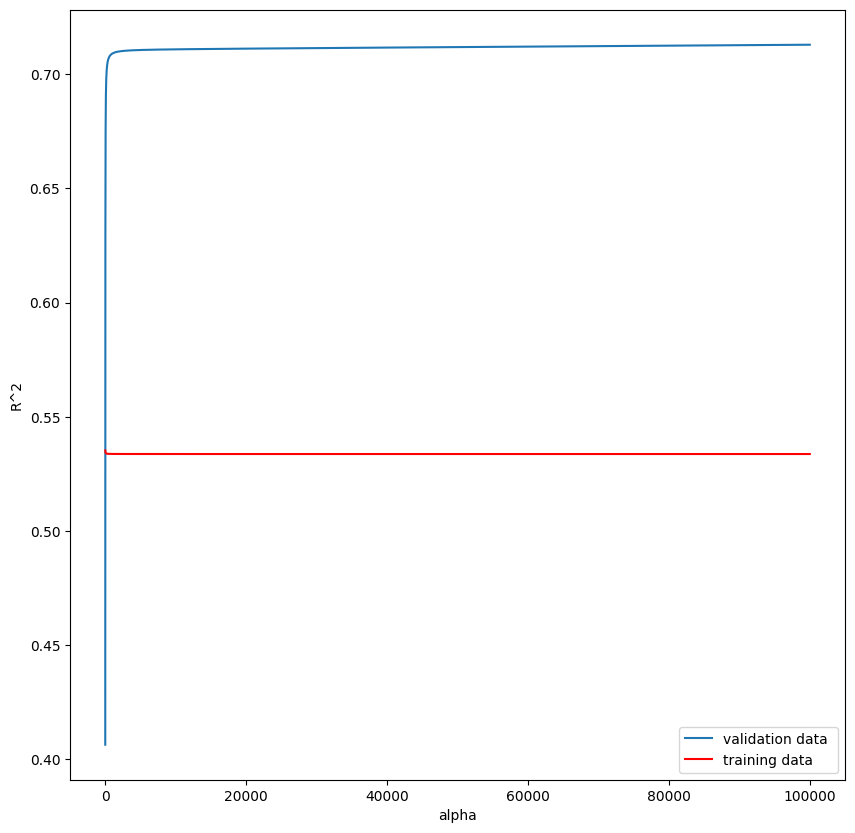

In [ ]:
# We can plot the value of R^2 for different alphas:

width = 10
height = 10
plt.figure (figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label = 'validation data ')
plt.plot(Alpha, Rsqu_train, 'r', label= 'training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [ ]:
'''Perform Ridge regression. Calculate the R^2 using the polynomial features,
 use the training data to train the model and use the test data to test the
 model. The parameter alpha should be set to 10.''';

RidgeModel = Ridge(alpha=10)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)

0.5802633843254112

In [ ]:
# Since the term alpha is a hyperparameter. sklearn has the class GridSearchCV

''' Now create a dictionary of parameter values''';

parameters_1 =[{'alpha': [0.001,0.1,1,10,100,1000,10000,100000,1000000]}]
parameters_1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [ ]:
# Create ridge regression obj
RR = Ridge()
RR

Ridge()

In [ ]:
# Create a grid search obj
Grid1 = GridSearchCV(RR, parameters_1, cv=4)

In [ ]:
#fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [ ]:
# The object finds the best parameter values on the validation data. to validate
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [ ]:
# Now test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
''' Perform a grid search to find the best alpha value and check if using
feature scaling improves the model''';

#Scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

#Define alpha
paramaters_2 = [{'alpha': [0.001,0.1,1,10,100,1000,10000,100000,1000000]}]

#Grid search
Grid2 = GridSearchCV(Ridge(), parameters_1, cv=4)
Grid2.fit(x_scaled, y_data)

#Best model
Best_ridge_model = Grid2.best_estimator_
best_alpha = Grid2.best_params_
print(f"Best alpha value is {best_alpha}")

Best alpha value is {'alpha': 100}


## Laptop pricing dataset

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(url, header=0)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [ ]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis =1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   GPU               238 non-null    int64  
 3   OS                238 non-null    int64  
 4   CPU_core          238 non-null    int64  
 5   Screen_Size_inch  238 non-null    float64
 6   CPU_frequency     238 non-null    float64
 7   RAM_GB            238 non-null    int64  
 8   Storage_GB_SSD    238 non-null    int64  
 9   Weight_pounds     238 non-null    float64
 10  Price             238 non-null    int64  
 11  Price-binned      238 non-null    object 
 12  Screen-Full_HD    238 non-null    int64  
 13  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 26.2+ KB


In [ ]:
''' Divide the dataset into x_data and y_data parameters.
Here y_data is the "Price" attribute, and x_data has all other attributes
in the data set.''';

y_data = df[['Price']]
x_data = df.drop('Price', axis=1)

In [ ]:
'''Split the data set into training and testing subests such that you reserve
10% of the data set for testing purposes.''';

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state=1)

print(f"The number of test samples is {x_test.shape[0]}")
print(f"The number of train samples is {x_train.shape[0]}")

The number of test samples is 24
The number of train samples is 214


In [ ]:
''' Create a single variable linear regression model using "CPU_frequency"
parameter. Print the R^2 value of this model for the training and testing subsets''';

lre = LinearRegression()

lre.fit(x_train[['CPU_frequency']], y_train)

print(f"The R^2 value of the training data is {lre.score(x_test[['CPU_frequency']], y_test)}")
print(f"The R^2 value of the testing data is {lre.score(x_train[['CPU_frequency']], y_train)}")

The R^2 value of the training data is -0.06599437350393789
The R^2 value of the testing data is 0.14829792099817973


In [ ]:
''' Run a 4-fold cross validation on the model and print the mean value of
R^2 score along with its standard deviation.''';

Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)

print(Rcross)

#Now for the mean and std

print(f"The mean of the folds are {Rcross.mean()}, meanwhile, the Standard deviation is {Rcross.std()}")

[-0.82012763  0.10035872  0.11202939 -0.03662978]
The mean of the folds are -0.16109232388595113, meanwhile, the Standard deviation is 0.384957978666471


### Overfitting

In [ ]:
''' Split the data set into training and testing components again, this time
reserving 50% of the data set for testing''';

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.5, random_state=1)

Text(3, 0.75, 'Maximum R^2')

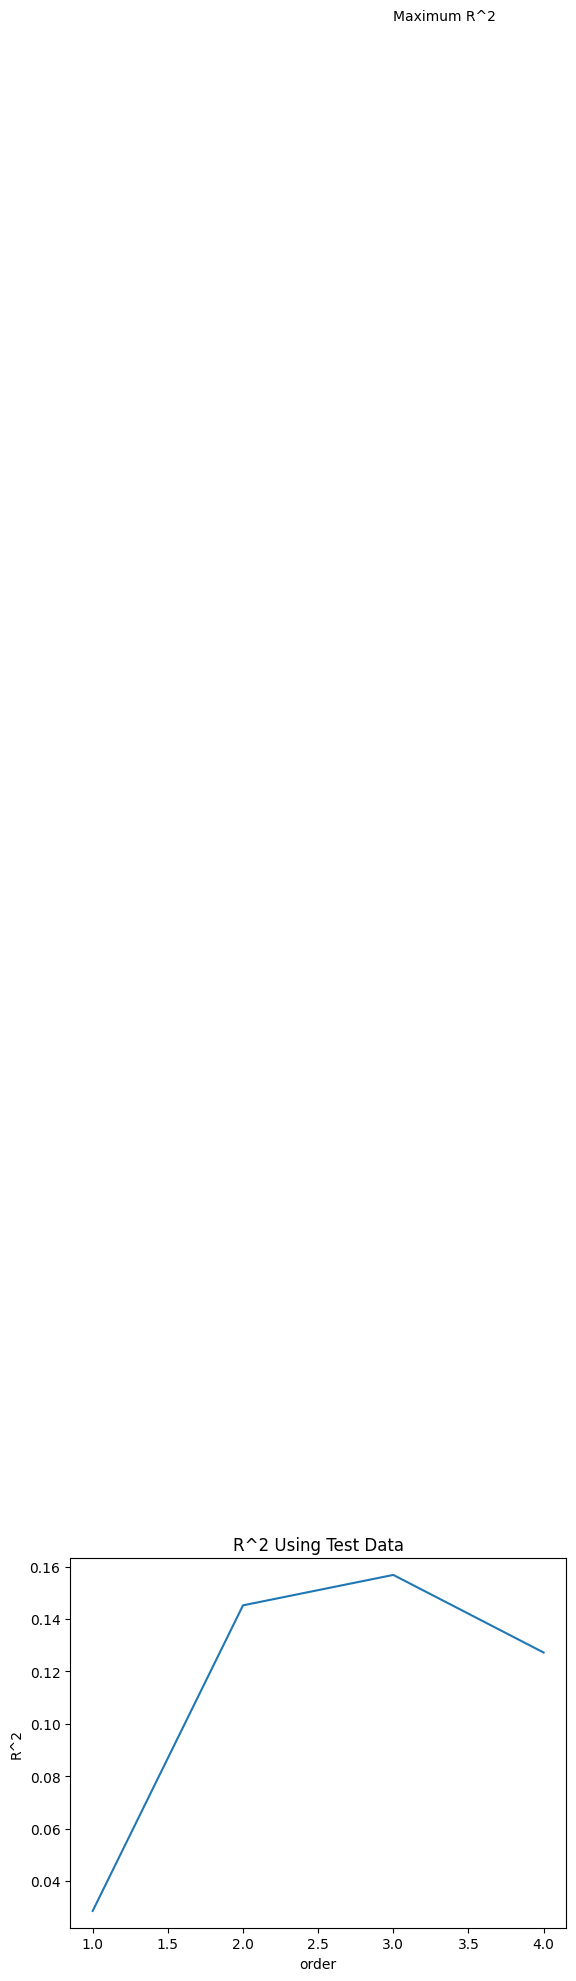

In [ ]:
''' To identify the point of overfitting the model on the parameter
"CPU_frequency", you'll need to create polynomial features using the single
attribute. You need to evaluate the R^2 scores of the model created using different
degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.''';

Rsqu_test = []
Order = [1,2,3,4,5]

for n in order:
  pr = PolynomialFeatures(degree=n)
  x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
  x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
  lre.fit(x_train_pr, y_train)
  Rsqu_test.append(lre.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

In [ ]:
# Well it bugged lol. Still the best option is the 3rd degree

### Ridge Regression

In [ ]:
''' Now consider that you have multiple features, i.e. 'CPU_frequency',
'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a
polynomial feature model that uses all these parameters with degree=2. Also create
the training and testing attribute sets.''';

pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])

x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS', 'GPU', 'Category']])

In [ ]:
''' Create a Ridge Regression model and evaluate it using values of the
hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. Create a
list of all Ridge Regression R^2 scores for training and testing data.''';

Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
  RidgeModel = Ridge(alpha=alpha)
  RidgeModel.fit(x_train_pr, y_train)
  test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)

  pbar.set_postfix({"Test score": test_score, "Train score": train_score})

  Rsqu_test.append(test_score)
  Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:07<00:00, 126.22it/s, Test score=0.507, Train score=0.642]


In [ ]:
''' Using the raw data and the same set of features as used above,
use GridSearchCV to identify the value of alpha for which the model performs
best. Assume the set of alpha values to be used as''';

# {0.0001, 0.001, 0.01, 0.1, 1, 10}

parameters_1 = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
parameters_1

[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

In [ ]:
''' Create a Ridge instance and run Grid Search using a 4 fold cross validation.''';

#Create the Ridge instance
RR = Ridge()

#Grid search with 4 fold cross val
Grid1 = GridSearchCV(RR, parameters_1, cv=4)

# Fit the grid search
Grid1.fit(x_data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [ ]:
#Estimate the best
BestRR = Grid1.best_estimator_
print(BestRR)

#Print the R^2 score
R_score = BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']], y_test)
print(f"The R^2 score for the Ridge Nodel is that of {R_score}")

Ridge(alpha=0.0001)
The R^2 score for the Ridge Nodel is that of 0.49842863913133806


## Preparation to final practice: Insurance Cost Analysis

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(url, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [ ]:
'''Add the headers to the dataframe, as mentioned in the project scenario.''';

headers = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
''' Now, replace the '?' entries with 'NaN' values.''';

df.replace('?', np.nan, inplace = True)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [ ]:
''' Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information. ''';
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

age
age
False    2768
True        4
Name: count, dtype: int64

gender
gender
False    2772
Name: count, dtype: int64

bmi
bmi
False    2772
Name: count, dtype: int64

no_of_children
no_of_children
False    2772
Name: count, dtype: int64

smoker
smoker
False    2765
True        7
Name: count, dtype: int64

region
region
False    2772
Name: count, dtype: int64

charges
charges
False    2772
Name: count, dtype: int64



In [ ]:
''' Meaning we have 4 null values for continuous attribs and 7 null values for categorical attribs ''';

#We must use the mean to replcae those values in the numerical data

avg_age = df['age'].astype('float').mean(axis=0)
# Replace with actual dataset

df.replace({'age':np.nan}, avg_age, inplace = True)

# Now for the smokers. let's count
df['smoker'].value_counts()

# 0 (Which means No) is the most common type. let's calculate the most common type
is_smoker = df['smoker'].value_counts().idxmax()

# Replace the value sin the dataset
df.replace({'smoker':np.nan}, is_smoker, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
'''Also note, that the charges column has values which are more than 2 decimal }
places long. Update the charges column such that all values are rounded to
nearest 2 decimal places. Verify conversion by printing the first 5 values of
the updated dataframe.''';

df['charges'] = np.round(df['charges'], 2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


(0.0, 66902.85800000001)

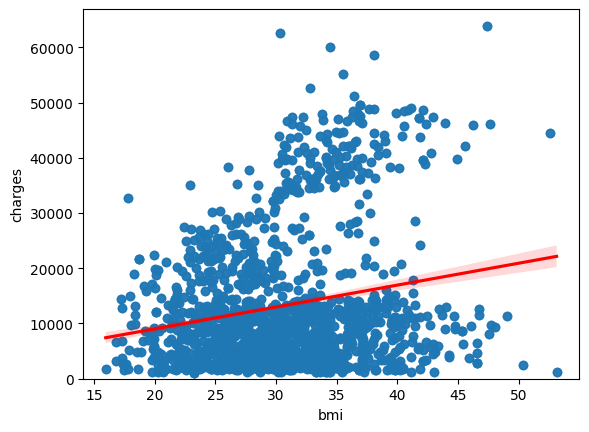

In [ ]:
'''Implement the regression plot for charges with respect to bmi.''';

sns.regplot(x='bmi', y='charges', data=df, line_kws={'color': 'red'})
plt.ylim(0,)

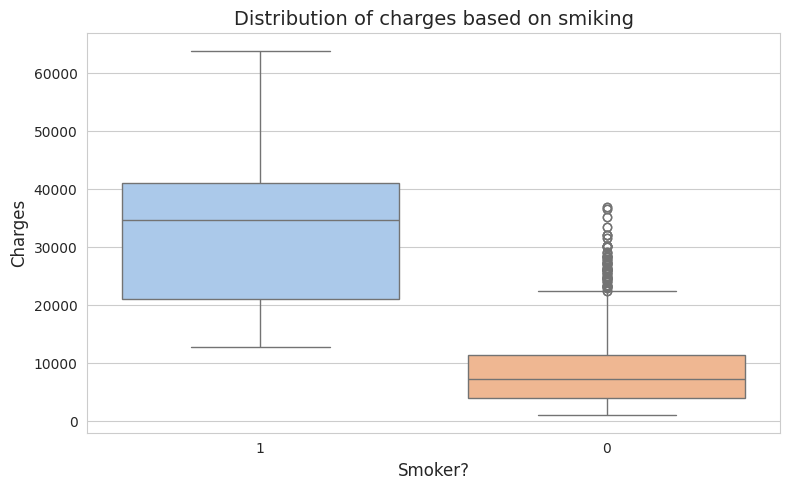

In [ ]:
'''Implement the box plot for charges with respect to smoker''';
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.boxplot(x = 'smoker', y='charges', data=df, palette ='pastel')
plt.title("Distribution of charges based on smiking", fontsize=14)
plt.xlabel("Smoker?", fontsize=12)
plt.ylabel("Charges", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
''' Print the correlation matrix for the dataset ''';
correlation_matrix = df.corr()
correlation_matrix

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026041,0.113045,0.037585,-0.023285,-0.007175,0.298622
gender,-0.026041,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113045,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037585,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023285,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007175,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298622,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


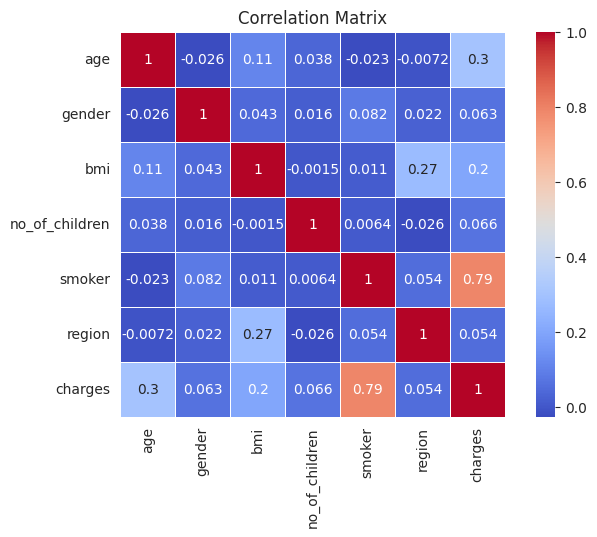

In [ ]:
''' For visualization purposes, I will make a heatmap''';

plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm',linewidths=0.5, linecolor='white', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

### Model development

In [ ]:
'''Fit a linear regression model that may be used to predict the charges value,
just by using the smoker attribute of the dataset. Print the R^2
 score of this model''';

lm = LinearRegression()

X = df[['smoker']]
Y = df['charges']

lm.fit(X,Y)

print(f"The R^2 score is {lm.score(X,Y)}")

The R^2 score is 0.6221791733924185


In [ ]:
'''Fit a linear regression model that may be used to predict the charges value,
just by using all other attributes of the dataset. Print the R^2
 score of this model. You should see an improvement in the performance.''';

Z = df.drop(['charges'], axis=1)
Y = df['charges']

lm.fit(Z,Y)

print(f"The R^2 score is {lm.score(Z,Y)}")

The R^2 score is 0.7504063772187107


In [ ]:
'''Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and
LinearRegression() to create a model that can predict the charges value using
all the other attributes of the dataset.
There should be even further improvement in the performance.''';

# Creating an input with the parameters and then the pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)

# Re assigning Z and fitting the dependent and indepent variables in the pipe. then make the prediction
Z = Z.astype(float) #Avoid comparisons
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)


# Print the R^2 score
print(f"The R^2 score is {r2_score(Y,ypipe)}")


The R^2 score is 0.8452558518297514


### Model Refinement

In [ ]:
''' Split the data into training and testing subsets, assuming that 20% of the
data will be reserved for testing.''';

#Frist define the data to work
y_data = df['charges']
x_data = Z

#Split the data into training and thesting
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state=1)

In [ ]:
''' Initialize a Ridge regressor that used hyperparameter a = 0.1
 Fit the model using training data data subset. Print the  R^2
 score for the testing data.''';

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

yhat = RidgeModel.predict(x_test)
print(f"The R^2 score is {r2_score(y_test, yhat)}")

The R^2 score is 0.6760802462837339


In [ ]:
'''Apply polynomial transformation to the training parameters with degree=2.
Use this transformed feature set to fit the same regression model, as above,
using the training subset. Print the R^2 score for the testing subset.''';

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RidgeModel.fit(x_train_pr, y_train)

yhat = RidgeModel.predict(x_test_pr)
print(f"The R^2 score is {r2_score(y_test, yhat)}")

The R^2 score is 0.783563057875534


## Final Proyect

In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the screenshots of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.). They will need to be shared in the following Peer Review section of the Final Project module.

### About the dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from here. It was also slightly modified for the purposes of this course.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(url, header=0)

### Task: Import the dataset

Import the dataset into a pandas dataframe. Note that there are currently no headers in the CSV file.

In [ ]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


In [ ]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Module 2: Data Wrangling

In [ ]:
''' Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(),
then use the method describe() to obtain a statistical summary of the data.
Make sure the inplace parameter is set to True''';

df.drop(['id', 'Unnamed: 0'], axis = 1, inplace = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
 # Just for checking the nulls in the entire dataset
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

date
date
False    21613
Name: count, dtype: int64

price
price
False    21613
Name: count, dtype: int64

bedrooms
bedrooms
False    21600
True        13
Name: count, dtype: int64

bathrooms
bathrooms
False    21603
True        10
Name: count, dtype: int64

sqft_living
sqft_living
False    21613
Name: count, dtype: int64

sqft_lot
sqft_lot
False    21613
Name: count, dtype: int64

floors
floors
False    21613
Name: count, dtype: int64

waterfront
waterfront
False    21613
Name: count, dtype: int64

view
view
False    21613
Name: count, dtype: int64

condition
condition
False    21613
Name: count, dtype: int64

grade
grade
False    21613
Name: count, dtype: int64

sqft_above
sqft_above
False    21613
Name: count, dtype: int64

sqft_basement
sqft_basement
False    21613
Name: count, dtype: int64

yr_built
yr_built
False    21613
Name: count, dtype: int64

yr_renovated
yr_renovated
False    21613
Name: count, dtype: int64

zipcode
zipcode
False    21613
Name: count, dtype: int64

lat
lat


In [ ]:
print(f"number of NaN values of the coulmn bedrooms : {df['bedrooms'].isnull().sum()}")
print(f"Number of Nan values of the column bathrooms : {df['bathrooms'].isnull().sum()}")

number of NaN values of the coulmn bedrooms : 13
Number of Nan values of the column bathrooms : 10


In [ ]:
''' We can replace the missing values of the column 'bedrooms' with the mean
of the column 'bedrooms'  using the method replace(). Don't forget to
set the inplace parameter to True''';

mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

/tmp/ipython-input-2953354337.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)


In [ ]:
''' We also replace the missing values of the column 'bathrooms' with the mean
of the column 'bathrooms'  using the method replace(). Don't forget to set the
inplace  parameter top  True ''';

mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

/tmp/ipython-input-306078859.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,mean, inplace=True)


In [ ]:
print(f"number of NaN values of the coulmn bedrooms : {df['bedrooms'].isnull().sum()}")
print(f"Number of Nan values of the column bathrooms : {df['bathrooms'].isnull().sum()}")

number of NaN values of the coulmn bedrooms : 0
Number of Nan values of the column bathrooms : 0


### Module 3: Exploratory Data analysis

In [ ]:
''' Use the method value_counts to count the number of houses with unique floor
values, use the method .to_frame() to convert it to a data frame. Take a screenshot
of your code and output. You will need to submit the screenshot for the final project.''';

floors1 = df['floors'].value_counts().to_frame()
floors1

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


/tmp/ipython-input-1280736626.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'waterfront', y='price', data=df, palette ='pastel')


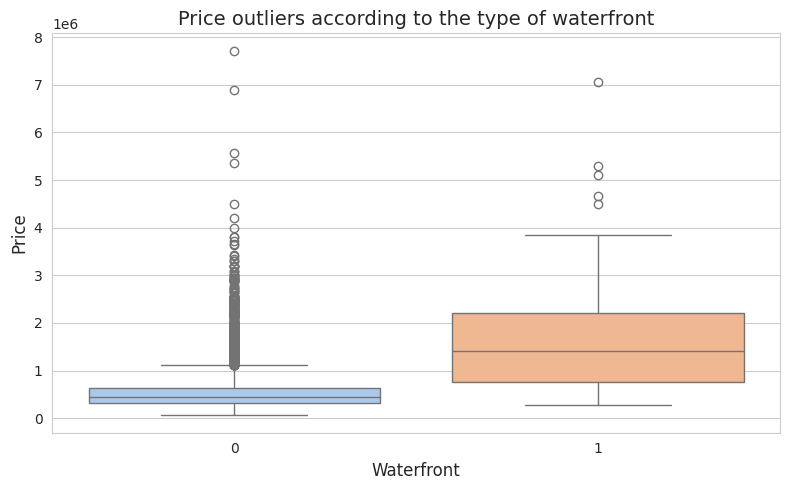

In [ ]:
'''Use the function boxplot in the seaborn library to determine whether houses
with a waterfront view or without a waterfront view have more price outliers.
Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.''';

plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.boxplot(x = 'waterfront', y='price', data=df, palette ='pastel')
plt.title("Price outliers according to the type of waterfront", fontsize=14)
plt.xlabel("Waterfront", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.tight_layout()
plt.show()

(0.0, 8081250.0)

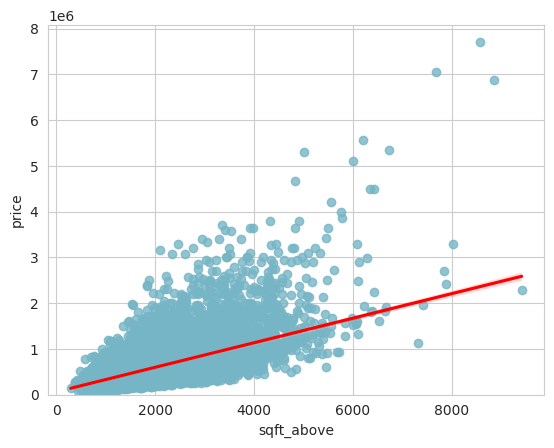

In [ ]:
'''Use the function regplot in the seaborn library to determine if the feature
sqft_above is negatively or positively correlated with price. Take a screenshot
of your code and scatterplot. You will need to submit the screenshot for the final project.''';

sns.regplot(x='sqft_above', y='price', data=df, color='#76b5c5', line_kws={'color': 'red'})
plt.ylim(0,)

In [ ]:
''' We can use the Pandas method corr() to find the feature other
than price that is most correlated with price. ''';

df_numeric = df.select_dtypes(include=[np.number])
df_numeric_1 = df_numeric.corr()
df_numeric.corr()['price'].sort_values()


,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


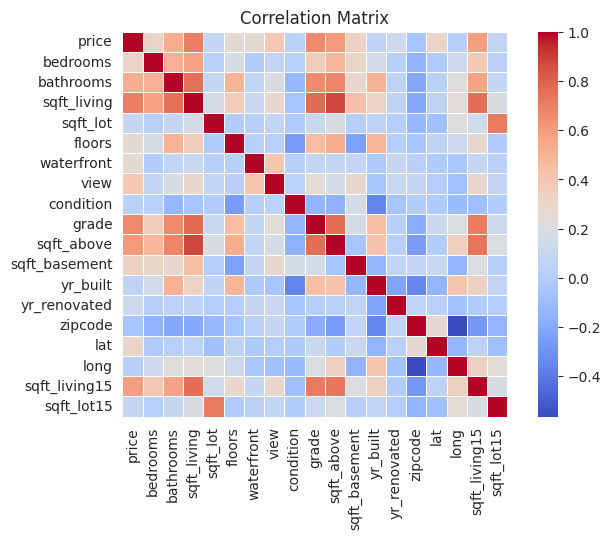

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df_numeric_1, cmap= 'coolwarm',linewidths=0.5, linecolor='white', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

### Module 4: Model Development

We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [ ]:
X = df[['long']]
Y = df['price']

lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.00046769430149007363

In [ ]:
'''Fit a linear regression model to predict the 'price' using the feature
'sqft_living' then calculate the R^2. Take a screenshot of your code and the
value of the R^2. You will need to submit it for the final project.''';

X = df[['sqft_living']]
Y = df['price']

lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

In [ ]:
#Fit a linear regression model to predict the 'price' using the list of features:

features = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

''' Then calculate the R^2. Take a screenshot of your code and the value of the
R^2. You will need to submit it for the final project.''';

Z = df[features]
Y = df['price']

lm = LinearRegression()
lm.fit(Z,Y)
print(f"The R^2 score for the model is {lm.score(Z,Y)}")

The R^2 score for the model is 0.65769516660375


In [ ]:
'''Use the list to create a pipeline object to predict the 'price',
fit the object using the features in the list features, and calculate the R^2.
Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.''';

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

pipe = Pipeline(Input)

Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)

print(f"The R^2 score for the model is {r2_score(Y,ypipe)}")

The R^2 score for the model is 0.7513408515988734


#### Module 5: Model Evaluation and refinement

In [ ]:
#Split data into training and testing

X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
'''Create and fit a Ridge regression object using the training data, set the
regularization parameter to 0.1, and calculate the R^2 using the test data.
Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.''';

RidgeModel = Ridge(alpha=0.1)

RidgeModel.fit(x_train, y_train)

yhat = RidgeModel.predict(x_test)
print(f"The R^2 score is {r2_score(y_test, yhat)}")

The R^2 score is 0.6478759163939113


In [ ]:
''' Perform a second order polynomial transform on both the training data and
testing data. Create and fit a Ridge regression object using the training data,
set the regularisation parameter to 0.1, and calculate the R^2 utilising the test
data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.''';

pr = PolynomialFeatures(degree=2)

x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train)

yhat = RidgeModel.predict(x_test_pr)
print(f"The R^2 value for this model is {r2_score(y_test, yhat)}")

The R^2 value for this model is 0.7002744273539743


##Data analysis has been completed:

This was a rather complicated course. I am grateful of the knowledge acquired.